### World Income Inequality Data Visualization - Project 3 Group 5
#### Group Members
- Deogratius Nteza
- Xuan (Sam) Chen
- Travis Jones
- Gifty Appiagyei
- Yao Xiao

# Data Sources
- UNU-WIDER, World Income Inequality Database (WIID). Version 28 November 2023. https://doi.org/10.35188/UNU-WIDER/WIID-281123
The World Income Inequality Database (WIID) presents information on income inequality for most countries and historical entities. It provides the most comprehensive set of income inequality statistics available and can be downloaded for free

- Human Development Index (HDI) https://hdr.undp.org/data-center/human-development-index#/indicies/HDI
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

**Note:** We selected to look at data for 2018 and 2022, with the express purpose of trying to detect what impact COVID-19 restrictions had.

In [37]:
# Import the dependencies.
from pathlib import Path
from sqlalchemy import create_engine, MetaData, Table, select
import pandas as pd
import matplotlib.pyplot as plt

# Create a reference to the file.
database_path = Path("Resources/data.sqlite")

In [38]:
# Create a connection that can talk to the database
conn = create_engine(f"sqlite:///{database_path}").connect()

In [39]:
# Reflect the existing database into a new model
metadata = MetaData()
metadata.reflect(bind=conn)

In [40]:
# List all the tables in the database
tables = list(metadata.tables.keys())
print(tables)

['human_development_index', 'income_inequality_index']


In [41]:
# Reflect the tables
hdi = Table('human_development_index', metadata, autoload_with=conn)
iii = Table('income_inequality_index', metadata, autoload_with=conn)

# Build the join query
join_stmt = select(hdi, iii).select_from(
    hdi.join(iii, hdi.c.ctr_code == iii.c.ctr_code)
)


In [42]:
# Execute the query and fetch the result into a pandas DataFrame
with conn:
    result = conn.execute(join_stmt)
    df = pd.DataFrame(result.fetchall(), columns=result.keys())

# Display the DataFrame
df.head()


,ctr_code,country,hdicode,hdi_rank_2022,hdi_2018,hdi_2022,country_1,ctr_code_1,region_wb,incomegroup,gdp_2018,gdp_2022,gini_std_2018,gini_std_2022,population_2018,population_2022
0,ALB,Albania,High,74.0,0.797,0.789,Albania,ALB,Europe and Central Asia,Upper middle income,13317.11914,13278.37012,36.869999,35.220001,2877013.0,2866849.0
1,ARG,Argentina,Very High,48.0,0.852,0.849,Argentina,ARG,Latin America and the Caribbean,Upper middle income,22747.24219,22447.08789,39.099998,37.799999,44413596.0,45276780.0
2,ARM,Armenia,High,76.0,0.781,0.786,Armenia,ARM,Europe and Central Asia,Upper middle income,13231.43066,14193.11719,36.180000,31.320000,2836557.0,2790974.0
3,AUS,Australia,Very High,10.0,0.941,0.946,Australia,AUS,East Asia and the Pacific,High income,49052.81641,NaN,34.410000,NaN,24979230.0,NaN
4,AUT,Austria,Very High,22.0,0.917,0.926,Austria,AUT,Europe and Central Asia,High income,55217.28516,56280.50781,30.010000,30.700001,8840513.0,8922082.0


In [43]:
# drop country_1 and ctr_code_1 columns
df.drop(['country_1', 'ctr_code_1'], axis=1, inplace=True)
df.head()

,ctr_code,country,hdicode,hdi_rank_2022,hdi_2018,hdi_2022,region_wb,incomegroup,gdp_2018,gdp_2022,gini_std_2018,gini_std_2022,population_2018,population_2022
0,ALB,Albania,High,74.0,0.797,0.789,Europe and Central Asia,Upper middle income,13317.11914,13278.37012,36.869999,35.220001,2877013.0,2866849.0
1,ARG,Argentina,Very High,48.0,0.852,0.849,Latin America and the Caribbean,Upper middle income,22747.24219,22447.08789,39.099998,37.799999,44413596.0,45276780.0
2,ARM,Armenia,High,76.0,0.781,0.786,Europe and Central Asia,Upper middle income,13231.43066,14193.11719,36.180000,31.320000,2836557.0,2790974.0
3,AUS,Australia,Very High,10.0,0.941,0.946,East Asia and the Pacific,High income,49052.81641,NaN,34.410000,NaN,24979230.0,NaN
4,AUT,Austria,Very High,22.0,0.917,0.926,Europe and Central Asia,High income,55217.28516,56280.50781,30.010000,30.700001,8840513.0,8922082.0


In [44]:
# Export the pandas dataframe to json for use with the Leaflet
json_file_path = Path("Resources/data.json")

df.to_json(json_file_path, orient='records', lines=True)

In [45]:
# Number of Countries in Dataset
country_count = df["country"].count()
country_count

82

In [46]:
# Countries which have HDI decrease between 2018 and 2022
decreasing_hdi = df[(df["hdi_2022"] < df["hdi_2018"])]
decreasing_hdi

,ctr_code,country,hdicode,hdi_rank_2022,hdi_2018,hdi_2022,region_wb,incomegroup,gdp_2018,gdp_2022,gini_std_2018,gini_std_2022,population_2018,population_2022
0,ALB,Albania,High,74.0,0.797,0.789,Europe and Central Asia,Upper middle income,13317.119140,13278.370120,36.869999,35.220001,2877013.0,2866849.0
1,ARG,Argentina,Very High,48.0,0.852,0.849,Latin America and the Caribbean,Upper middle income,22747.242190,22447.087890,39.099998,37.799999,44413596.0,45276780.0
7,BLR,Belarus,Very High,69.0,0.812,0.801,Europe and Central Asia,Upper middle income,18974.746090,19239.552730,29.290001,28.650000,9695574.0,9633740.0
10,BOL,Bolivia (Plurinational State of),Medium,120.0,0.712,0.698,Latin America and the Caribbean,Lower middle income,8466.292969,8052.177246,43.799999,41.799999,11606905.0,12079472.0
11,BRA,Brazil,High,89.0,0.762,0.760,Latin America and the Caribbean,Upper middle income,14619.590820,15093.464840,51.660000,49.060001,210166592.0,214326224.0
12,BGR,Bulgaria,High,70.0,0.811,0.799,Europe and Central Asia,Upper middle income,22206.156250,26823.021480,40.380001,39.009998,7117431.0,6885868.0
16,COL,Colombia,High,91.0,0.766,0.758,Latin America and the Caribbean,Upper middle income,14426.434570,13358.297850,50.189999,54.090000,49276960.0,50930660.0
29,GEO,Georgia,Very High,60.0,0.816,0.814,Europe and Central Asia,Upper middle income,14253.409180,15486.659180,39.250000,36.930000,3772325.0,3757980.0
37,IRN,Iran (Islamic Republic of),High,78.0,0.787,0.780,Middle East and North Africa,Lower middle income,14628.946290,14432.362300,43.500000,43.599998,85617560.0,87290192.0
41,KAZ,Kazakhstan,Very High,67.0,0.804,0.802,Europe and Central Asia,Upper middle income,25544.345700,NaN,31.200001,NaN,18538100.0,NaN


In [47]:
# Create new column 'hdi_decrease'
hdi_difference_add = ['country', 'hdicode', 'hdi_2018', 'hdi_2022', 'region_wb', 'incomegroup', 'gini_std_2018', 'gini_std_2022', 'population_2018', 'population_2022', 'hdi_decrease']
hdi_difference = decreasing_hdi.reindex(columns=hdi_difference_add)
hdi_difference['hdi_decrease']=  hdi_difference['hdi_2022'] - hdi_difference['hdi_2018']

In [48]:
# Sort in descending order
hdi_difference_sorted = hdi_difference.sort_values(by='hdi_decrease')
hdi_difference_sorted

,country,hdicode,hdi_2018,hdi_2022,region_wb,incomegroup,gini_std_2018,gini_std_2022,population_2018,population_2022,hdi_decrease
76,Ukraine,High,0.771,0.734,Europe and Central Asia,Lower middle income,29.730000,29.400000,44446952.0,43909664.0,-0.037
56,North Macedonia,High,0.796,0.765,Europe and Central Asia,Upper middle income,34.240002,33.869999,2113491.0,2111072.0,-0.031
64,Russian Federation,Very High,0.836,0.821,Europe and Central Asia,Upper middle income,34.689999,35.040001,145652304.0,145617328.0,-0.015
10,Bolivia (Plurinational State of),Medium,0.712,0.698,Latin America and the Caribbean,Lower middle income,43.799999,41.799999,11606905.0,12079472.0,-0.014
52,Mongolia,High,0.754,0.741,East Asia and the Pacific,Lower middle income,36.099998,NaN,3163991.0,NaN,-0.013
12,Bulgaria,High,0.811,0.799,Europe and Central Asia,Upper middle income,40.380001,39.009998,7117431.0,6885868.0,-0.012
7,Belarus,Very High,0.812,0.801,Europe and Central Asia,Upper middle income,29.290001,28.650000,9695574.0,9633740.0,-0.011
58,Paraguay,High,0.742,0.731,Latin America and the Caribbean,Upper middle income,48.220001,48.310001,6443328.0,6703799.0,-0.011
0,Albania,High,0.797,0.789,Europe and Central Asia,Upper middle income,36.869999,35.220001,2877013.0,2866849.0,-0.008
16,Colombia,High,0.766,0.758,Latin America and the Caribbean,Upper middle income,50.189999,54.090000,49276960.0,50930660.0,-0.008


In [49]:
# Population decrease between 2018 and 2022
pop_difference_add = ['country', 'hdicode', 'hdi_2018', 'hdi_2022', 'region_wb', 'gini_std_2018', 'gini_std_2022', 'population_2018', 'population_2022', 'hdi_decrease', 'pop_decrease']
pop_difference = hdi_difference.reindex(columns=pop_difference_add)
pop_difference['pop_decrease']=  hdi_difference['population_2022'] - hdi_difference['population_2018']

In [50]:
# In descending order
pop_difference_sorted = pop_difference.sort_values(by='pop_decrease')
pop_difference_sorted

,country,hdicode,hdi_2018,hdi_2022,region_wb,gini_std_2018,gini_std_2022,population_2018,population_2022,hdi_decrease,pop_decrease
76,Ukraine,High,0.771,0.734,Europe and Central Asia,29.730000,29.400000,44446952.0,43909664.0,-0.037,-537288.0
63,Romania,Very High,0.829,0.827,Europe and Central Asia,36.180000,34.099998,19606784.0,19328560.0,-0.002,-278224.0
12,Bulgaria,High,0.811,0.799,Europe and Central Asia,40.380001,39.009998,7117431.0,6885868.0,-0.012,-231563.0
66,Serbia,Very High,0.808,0.805,Europe and Central Asia,30.060001,28.560001,7433818.0,7296769.0,-0.003,-137049.0
46,Lithuania,Very High,0.882,0.879,Europe and Central Asia,36.900002,36.680000,2876128.0,2786651.0,-0.003,-89477.0
51,Moldova (Republic of),High,0.767,0.763,Europe and Central Asia,29.610001,29.660000,3141837.0,3061506.0,-0.004,-80331.0
7,Belarus,Very High,0.812,0.801,Europe and Central Asia,29.290001,28.650000,9695574.0,9633740.0,-0.011,-61834.0
64,Russian Federation,Very High,0.836,0.821,Europe and Central Asia,34.689999,35.040001,145652304.0,145617328.0,-0.015,-34976.0
29,Georgia,Very High,0.816,0.814,Europe and Central Asia,39.250000,36.930000,3772325.0,3757980.0,-0.002,-14345.0
0,Albania,High,0.797,0.789,Europe and Central Asia,36.869999,35.220001,2877013.0,2866849.0,-0.008,-10164.0


In [51]:
df_sorted_gdp_2018 = df.sort_values(by='gdp_2018', ascending=False)
df_sorted_gdp_2018.head(10)

,ctr_code,country,hdicode,hdi_rank_2022,hdi_2018,hdi_2022,region_wb,incomegroup,gdp_2018,gdp_2022,gini_std_2018,gini_std_2022,population_2018,population_2022
47,LUX,Luxembourg,Very High,20.0,0.921,0.927,Europe and Central Asia,High income,114164.46880,115541.77340,33.490002,32.290001,607913.0,639321.0
38,IRL,Ireland,Very High,7.0,0.938,0.950,Europe and Central Asia,High income,83575.60156,113870.78910,31.389999,30.060001,4834507.0,4986526.0
72,CHE,Switzerland,Very High,1.0,0.957,0.967,Europe and Central Asia,High income,69629.33594,70097.36719,33.220001,33.999996,8514434.0,8691406.0
78,USA,United States,Very High,20.0,0.930,0.927,North America,High income,61348.45703,64702.98047,41.200001,39.790001,332140032.0,336997632.0
34,ISL,Iceland,Very High,3.0,0.958,0.959,Europe and Central Asia,High income,56816.56641,NaN,26.160000,NaN,352946.0,NaN
21,DNK,Denmark,Very High,5.0,0.942,0.952,Europe and Central Asia,High income,56178.77344,59704.23047,26.949999,26.429998,5766686.0,5854240.0
54,NLD,Netherlands,Very High,10.0,0.939,0.946,Europe and Central Asia,High income,56060.91406,58584.62500,28.940001,26.200001,17286042.0,17501696.0
4,AUT,Austria,Very High,22.0,0.917,0.926,Europe and Central Asia,High income,55217.28516,56280.50781,30.010000,30.700001,8840513.0,8922082.0
30,DEU,Germany,Very High,7.0,0.946,0.950,Europe and Central Asia,High income,53431.39453,53560.08984,31.920000,30.620001,82896696.0,83408552.0
71,SWE,Sweden,Very High,5.0,0.943,0.952,Europe and Central Asia,High income,52349.29297,54818.39844,30.650000,31.760000,10162298.0,10467097.0


In [52]:
# Identify unique regions:
unique_regions = df['region_wb'].unique()
unique_regions

array(['Europe and Central Asia', 'Latin America and the Caribbean',
       'East Asia and the Pacific', 'South Asia', 'North America',
       'Middle East and North Africa', 'Sub-Saharan Africa'], dtype=object)

In [53]:
average_gdp_2022_by_region = df.groupby('region_wb')['gdp_2022'].mean().sort_values(ascending=False)
average_gdp_2022_by_region

region_wb
North America                      64702.980470
Europe and Central Asia            39469.702162
Middle East and North Africa       33454.801025
East Asia and the Pacific          21449.938477
Latin America and the Caribbean    17033.811490
South Asia                          6679.671875
Sub-Saharan Africa                  2709.383057
Name: gdp_2022, dtype: float64

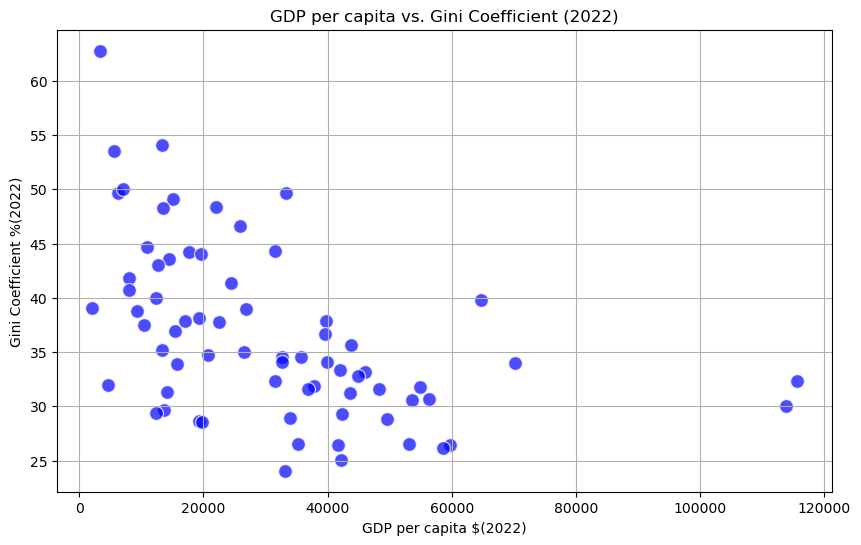

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_2022'], df['gini_std_2022'], color='blue', alpha=0.7, edgecolors='w', s=100)
plt.title('GDP per capita vs. Gini Coefficient (2022)')
plt.xlabel('GDP per capita $(2022)')
plt.ylabel('Gini Coefficient %(2022)')
plt.grid(True)
plt.show()

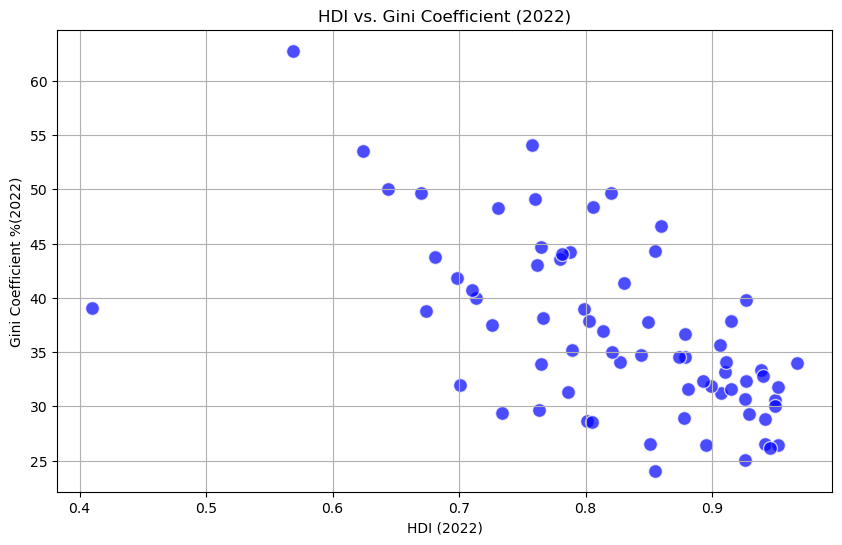

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['hdi_2022'], df['gini_std_2022'], color='blue', alpha=0.7, edgecolors='w', s=100)
plt.title('HDI vs. Gini Coefficient (2022)')
plt.xlabel('HDI (2022)')
plt.ylabel('Gini Coefficient %(2022)')
plt.grid(True)
plt.show()